In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 !unzip /content/drive/MyDrive/"대학부 데이터셋.zip" -d /content/drive/MyDrive/L2_dataset

In [4]:
import os
import numpy as np
import pandas as pd
import torch
import cv2
import glob
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
# from torch.utils.data import Dataset
# from torchvision import datasets
# from torchvision.transforms import ToTensor
# from torch.utils.data import Dataset, DataLoader
# from torchvision import datasets, transforms
import tensorflow as tf
import sys
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow

In [25]:
# 원데이터
# 파일 경로 가져오기
file_path1 = '/content/drive/MyDrive/L2_dataset/L2_3'
file_path2 = '/content/drive/MyDrive/L2_dataset/L2_10'
file_path3 = '/content/drive/MyDrive/L2_dataset/L2_12'
file_path4 = '/content/drive/MyDrive/L2_dataset/L2_15'
file_path5 = '/content/drive/MyDrive/L2_dataset/L2_20'
file_path6 = '/content/drive/MyDrive/L2_dataset/L2_21'
file_path7 = '/content/drive/MyDrive/L2_dataset/L2_24'
file_path8 = '/content/drive/MyDrive/L2_dataset/L2_25'
file_path9 = '/content/drive/MyDrive/L2_dataset/L2_27'
file_path10 = '/content/drive/MyDrive/L2_dataset/L2_30'
file_path11 = '/content/drive/MyDrive/L2_dataset/L2_33'
file_path12 = '/content/drive/MyDrive/L2_dataset/L2_34'
file_path13 = '/content/drive/MyDrive/L2_dataset/L2_39'
file_path14 = '/content/drive/MyDrive/L2_dataset/L2_40'
file_path15 = '/content/drive/MyDrive/L2_dataset/L2_41'
file_path16 = '/content/drive/MyDrive/L2_dataset/L2_44'
file_path17 = '/content/drive/MyDrive/L2_dataset/L2_45'
file_path18 = '/content/drive/MyDrive/L2_dataset/L2_46'
file_path19 = '/content/drive/MyDrive/L2_dataset/L2_50'
file_path20 = '/content/drive/MyDrive/L2_dataset/L2_52'

# 파일 경로 리스트로 저장
list_images1 = glob.glob(file_path1 + '/*')
list_images2 = glob.glob(file_path2 + '/*')
list_images3 = glob.glob(file_path3 + '/*')
list_images4 = glob.glob(file_path4 + '/*')
list_images5 = glob.glob(file_path5 + '/*')
list_images6 = glob.glob(file_path6 + '/*')
list_images7 = glob.glob(file_path7 + '/*')
list_images8 = glob.glob(file_path8 + '/*')
list_images9 = glob.glob(file_path9 + '/*')
list_images10 = glob.glob(file_path10 + '/*')
list_images11 = glob.glob(file_path11 + '/*')
list_images12 = glob.glob(file_path12 + '/*')
list_images13 = glob.glob(file_path13 + '/*')
list_images14 = glob.glob(file_path14 + '/*')
list_images15 = glob.glob(file_path15 + '/*')
list_images16 = glob.glob(file_path16 + '/*')
list_images17 = glob.glob(file_path17 + '/*')
list_images18 = glob.glob(file_path18 + '/*')
list_images19 = glob.glob(file_path19 + '/*')
list_images20 = glob.glob(file_path20 + '/*')

# 파일 개수 확인
print(len(list_images1))
print(len(list_images2))
print(len(list_images3))
print(len(list_images4))
print(len(list_images5))
print(len(list_images6))
print(len(list_images7))
print(len(list_images8))
print(len(list_images9))
print(len(list_images10))
print(len(list_images11))
print(len(list_images12))
print(len(list_images13))
print(len(list_images14))
print(len(list_images15))
print(len(list_images16))
print(len(list_images17))
print(len(list_images18))
print(len(list_images19))
print(len(list_images20))

6135
6028
6155
6100
6104
6116
6107
6082
6118
6165
6161
6109
6102
6152
6145
6115
6138
6110
6111
6108


In [ ]:
l1 = len(list_images1)
l2 = len(list_images2)
l3 = len(list_images3)
l4 = len(list_images4)
l5 = len(list_images5)
l6 = len(list_images6)
l7 = len(list_images7)
l8 = len(list_images8)
l9 = len(list_images9)
l10 = len(list_images10)
l11 = len(list_images11)
l12 = len(list_images12)
l13 = len(list_images13)
l14 = len(list_images14)
l15 = len(list_images15)
l16 = len(list_images16)
l17 = len(list_images17)
l18 = len(list_images18)
l19 = len(list_images19)
l20 = len(list_images20)

df = pd.DataFrame({
    'class ID' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'class': ['L2_3', 'L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_30', 'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52'],
    'value': [l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18, l19, l20],
    'filepath': [file_path1,file_path2,file_path3,file_path4,file_path5,file_path6,file_path7,file_path8, file_path9, file_path10, file_path11, file_path12, file_path13, file_path14, file_path15, file_path16, file_path17, file_path18, file_path19, file_path20]
    })

<BarContainer object of 20 artists>

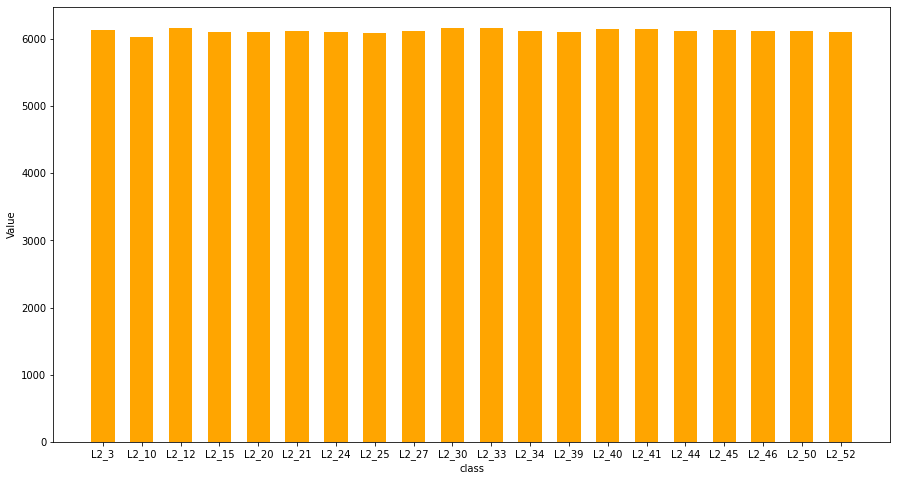

In [ ]:
x=df['class'].to_list()			#df(데이터 프레임)의 class를 리스트로 저장 
y=df['value'].to_list()			#df(테이터 프레임)의 value 필드를 리스트로 저장

plt.figure(figsize=(15, 8))			#그래프 크기 지정
plt.xlabel('class')				#그래프 x축 이름(label) 지정
plt.ylabel('Value')				#그래프 y축 이름(label) 지정

plt.bar(x, y, width=0.6, color='orange')	#리스트로 저장한 x와 y로 막대(bar) 그래프 플롯 

In [ ]:
#흑백 사진도 있고 3채널 jpg도 있고 4채널 jpg도 있고 4채널 png도 있음
file_path = '/content/drive/MyDrive/L2_dataset'
list_class= glob.glob(file_path + '/*')
for i  in list_class:
  list_images= glob.glob(i + '/*')
  for j in list_images:
    img = cv2.imread(j,cv2.IMREAD_UNCHANGED)
    #흑백
    if len(img.shape)==2:
      r=img[0,0]
      g=r
      b=r
      a=100
    #jpg
    elif len(img.shape)==3:
      #3채널 jpg
      if len(img[0,0])==3:
        r,g,b=img[0,0]
        a=100
      #4채널 jpg
      elif len(img[0,0])==4:
        r,g,b,a=img[0,0]
    #4채널 png
    elif len(img.shape)==4:
      r,g,b,a=img[0,0]
    
    if b!=255 or g!=255 or r!=255 and a!=0:#배경이 흰색이 아니고 투명화된 것도 아닐 경우
      os.remove(j)

In [ ]:
# 사진 제거 후 데이터

In [24]:
l1 = len(list_images1)
l2 = len(list_images2)
l3 = len(list_images3)
l4 = len(list_images4)
l5 = len(list_images5)
l6 = len(list_images6)
l7 = len(list_images7)
l8 = len(list_images8)
l9 = len(list_images9)
l10 = len(list_images10)
l11 = len(list_images11)
l12 = len(list_images12)
l13 = len(list_images13)
l14 = len(list_images14)
l15 = len(list_images15)
l16 = len(list_images16)
l17 = len(list_images17)
l18 = len(list_images18)
l19 = len(list_images19)
l20 = len(list_images20)


NameError: ignored

<BarContainer object of 20 artists>

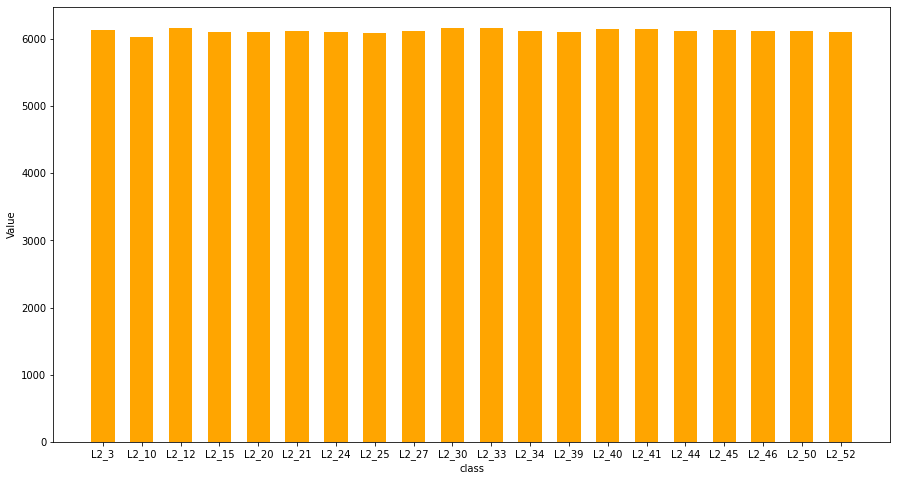

In [ ]:
x=df['class'].to_list()			#df(데이터 프레임)의 class를 리스트로 저장
y=df['value'].to_list()			#df(테이터 프레임)의 value 필드를 리스트로 저장

plt.figure(figsize=(15, 8))			#그래프 크기 지정
plt.xlabel('class')				#그래프 x축 이름(label) 지정
plt.ylabel('Value')				#그래프 y축 이름(label) 지정

plt.bar(x, y, width=0.6, color='orange')	#리스트로 저장한 x와 y로 막대(bar) 그래프 플롯 

In [ ]:
#2. (랜덤 언더샘플링 X) Data Augmentation만 수행할 경우(데이터 분포도 - 전체 데이터에 대해서 한 번 이상의 데이터 증강이 일어나도록 batch_size를 각각 지정하고 데이터 수를 6000~6200 사이로... )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
# image generator 생성

datagen = ImageDataGenerator(   
        rotation_range=90,      # 회전
        width_shift_range=0.2,  # 수평 방향 이동
        height_shift_range=0.2, # 수직 방향 이동
        brightness_range=(0.3, 0.7),    # 밝기      
        zoom_range=(0.5, 1.5),         # 확대
        horizontal_flip=True,   # 수평방향(가로) 뒤집기
        fill_mode='nearest'     # 수직방향(세로) 뒤집기
       )

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_3'], batch_size=30, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_3'):
    i += 1
    if i == 213:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_10'], batch_size=2, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_10'):
    i += 1
    if i == 2131:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_12'], batch_size=45, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_12'):
    i += 1
    if i == 139:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_15'], batch_size=3, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_15'):
    i += 1
    if i == 1540:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_20'], batch_size=14, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_20'):
    i += 1
    if i == 407:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_21'], batch_size=13, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_21'):
    i += 1
    if i == 446:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_24'], batch_size=13, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_24'):
    i += 1
    if i == 440:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_27'], batch_size=13, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_27'):
    i += 1
    if i == 443:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_30'], batch_size=15, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_30'):
    i += 1
    if i == 387:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_34'], batch_size=13, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_34'):
    i += 1
    if i == 439:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_39'], batch_size=12, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_39'):
    i += 1
    if i == 477:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_40'], batch_size=33, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_40'):
    i += 1
    if i == 200:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_41'], batch_size=28, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_41'):
    i += 1
    if i == 227:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_44'], batch_size=10, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_44'):
    i += 1
    if i == 562:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_45'], batch_size=8, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_45'):
    i += 1
    if i == 695:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_46'], batch_size=1, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_46'):
    i += 1
    if i == 3909:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_50'], batch_size=13, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_50'):
    i += 1
    if i == 450:
        break

In [ ]:
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/L2_dataset', classes=['L2_52'], batch_size=15, color_mode='rgb', target_size=(255, 255), save_to_dir='/content/drive/MyDrive/L2_dataset/L2_52'):
    i += 1
    if i == 394:
        break

In [23]:
x=df['class'].to_list()			#df(데이터 프레임)의 class를 리스트로 저장
y=df['value'].to_list()			#df(테이터 프레임)의 value 필드를 리스트로 저장

plt.figure(figsize=(15, 8))			#그래프 크기 지정
plt.xlabel('class')				#그래프 x축 이름(label) 지정
plt.ylabel('Value')				#그래프 y축 이름(label) 지정

plt.bar(x, y, width=0.6, color='orange')	#리스트로 저장한 x와 y로 막대(bar) 그래프 플롯 

NameError: ignored

In [9]:
file_path = pathlib.Path('/content/drive/MyDrive/L2_dataset')
class_path=list(file_path.glob('*'))
image_path = list(file_path.glob('*/*'))
#사진리스트에 들어갔는지 확인
print(image_path[:10])
class_path

[PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_1547_5470832.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_118_152435.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_1086_716243.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_998_1262820.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_1456_6696023.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_926_5906124.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_431_1341008.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_1699_8815264.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_1659_8880596.png'), PosixPath('/content/drive/MyDrive/L2_dataset/L2_10/_1486_7956831.png')]


[PosixPath('/content/drive/MyDrive/L2_dataset/L2_10'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_12'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_15'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_20'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_21'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_24'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_25'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_27'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_3'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_30'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_33'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_34'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_39'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_40'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_41'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_44'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_45'),
 PosixPath('/content/drive/MyDrive/L2_dataset/L2_46'),
 PosixPath(

In [10]:
#데이터셋 사이즈
batch_size = 32
img_height = 50
img_width = 50

#분할
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  file_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 122361 files belonging to 21 classes.
Using 97889 files for training.


In [11]:
#train,val로 나눔
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  file_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 122361 files belonging to 21 classes.
Using 24472 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['.ipynb_checkpoints', 'L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_3', 'L2_30', 'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52']


In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 50, 50, 3)
(32,)


In [14]:
#데이터 러닝시 성능 향상을 위한 코드...
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
#0~255to0~1
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [17]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.046078496 1.0


In [18]:
num_classes = 20
#convolutional model.........
model = Sequential([
    
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.Normalization(),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

In [19]:
model.compile(optimizer='adam',#최적화 알고리즘='adam' , 손실계산
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 normalization (Normalizatio  (None, 50, 50, 3)        7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0

In [21]:
checkpoint_path = "content/drive/MyDrive/L2_dataset.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                   save_weights_only=True,
                                   verbose=1)

In [22]:
#모델 훈련
epochs=10#under or over 조절
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cp_callback]
)

Epoch 1/10
1937/3060 [=================>............] - ETA: 25:53 - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/L2_dataset_model.h5')

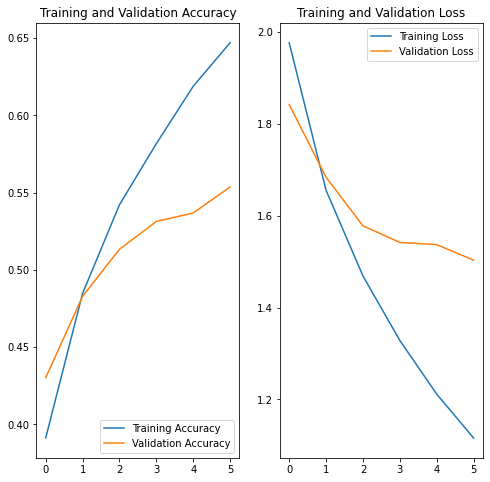

In [ ]:
#훈련결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
pip install split-folders tqdm

import splitfolders
splitfolders.ratio('/content/drive/MyDrive/L2_dataset', output="/content/drive/MyDrive/L2_dataset_val", seed=77, ratio=(0.8, 0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import os
from model import get_classifier
from sklearn.metrics import f1_score, classification_report

os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


def run_eval(model, loader):     
    preds = []
    labels = []
    for img, label in loader:
        y_prob = model.predict(img)
        y_pred = np.argmax(y_prob, axis=1)

        preds.append(y_pred)
        labels.append(label)
    
    y_pred = np.concatenate(preds, axis=0)
    y_test = np.concatenate(labels, axis=0)
    result = classification_report(y_test, y_pred, output_dict=True)

    return pd.DataFrame(result)


def freeze(model):
    for layer in model.layers:
        layer.trainable = False
        
    return model


def check_across_seeds(accs, f1s, result_df, num_classes=20):
    accs = np.array(accs)
    f1s = np.array(f1s)
    
    assert np.all(np.abs(accs[1:] - accs[:1]) < 1e-1) and np.all(np.abs(f1s[1:] - f1s[:1]) < 1e-1), "test results are not compatible \n{}\n{}".format(accs, f1s)

    print("*** CLASSWISE RESULT ***")
    cwise_result = result_df.loc[['f1-score', 'recall', 'support'], [str(i) for i in range(num_classes)]]
    cwise_result = cwise_result.rename(index={'f1-score' : 'f1', 'recall' : 'acc', 'support' : 'support'})
    print(cwise_result)
    
    print("\n*** AVG RESULT ***")
    avg_result = pd.Series({'f1' : result_df.loc['f1-score', 'macro avg'], 'acc' : result_df['accuracy'].values[0]})
    print(avg_result)
    
    
def main():
    ''' 
    Fill in the root directory path into DATA_DIR.
    You must write the subset directory for the specific split (train or valid).
    Under the root directory, the child folders should be "L2_3", "L2_10", ... , "L2_52"
    
    EX) if you named your valid dataset folder as "~/valid"
    then the child directory should be "~/valid/L2_3", "~/valid/L2_10", ... , "~/valid/L2_52"
    
    so you have to write as
    DATA_DIR = "~/valid"
    '''
    DATA_DIR = "content/drive/MyDrive/L2_dataset"            
    IMAGENET_DEFAULT_MEAN = (0.485, 0.456, 0.406)
    IMAGENET_DEFAULT_VAR = (0.229 ** 2, 0.224 ** 2, 0.225 ** 2)
    
    
    ''' 
    You need to implement "get_classifier" function that returns your implemented model.
    "get_classifier" should return your model defined with your model configuration.
    Also, you should save your model.
    
    EX)
    model.save_weights('model.ckpt')
    or
    model.save('model.h5')
    '''
    CLF = get_classifier(num_classes=20) 
    CKPT_PATH = "content/drive/MyDrive/L2_dataset/L2_dataset.h5"
    
    """ if saved with model.save_weights() """
    # CLF.load_weights(CKPT_PATH).expect_partial()
    # if necessary
    # CLF.build(input_shape=[None, 224, 224, 3])
    # print(CLF.summary())
    
    """ if saved with model.save() """
    CLF = load_model(CKPT_PATH)


    CLF = freeze(CLF)
    CLF.compile(metrics=['accuracy'])
    
    SEEDS = [0, 5, 10]
    ACC_LIST = []
    F1_LIST = []
    for seed in SEEDS:
        tf.random.set_seed(seed)
        
        loader = tf.keras.preprocessing.image_dataset_from_directory(
            directory=DATA_DIR,
            image_size=(256, 256),
            batch_size=128,
            shuffle=False
            )
        
        augmentation_layer = tf.keras.Sequential([
            tf.keras.layers.CenterCrop(224,224),
            tf.keras.layers.Rescaling(1./255),  
            tf.keras.layers.experimental.preprocessing.Normalization(mean=IMAGENET_DEFAULT_MEAN, variance=IMAGENET_DEFAULT_VAR)          
        ])
        loader = loader.map(lambda x,y: (augmentation_layer(x),y))
        
        RESULT_DF = run_eval(CLF, loader)
        ACC_LIST.append(RESULT_DF['accuracy'].values[0])
        F1_LIST.append(RESULT_DF.loc['f1-score', 'macro avg'])

    check_across_seeds(ACC_LIST, F1_LIST, RESULT_DF)

    
if __name__=="__main__":
    main()    
    
 